In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import time
import datetime

import xobjects as xo

from config import lhc_configs, particle_config_low, particle_config_mid, particle_config_high, run_config_quickest, run_config_test, run_config_dyn_indicator, run_config_ground_truth

import definitive_dyn_indicators.utils.xtrack_engine as xe

In [2]:
cpu_count = os.cpu_count()
cpu_count = 1

context = xo.ContextCpu(cpu_count)

particle_config = particle_config_low[0]
lhc_config = lhc_configs[0]
run_config = run_config_quickest

In [3]:
intial_conditions = particle_config.get_initial_codintions()
displacement = particle_config.get_initial_conditions_with_displacement(run_config.displacement_module, "random")
displacement_x = particle_config.get_initial_conditions_with_displacement(run_config.displacement_module, "x")
displacement_px = particle_config.get_initial_conditions_with_displacement(run_config.displacement_module, "px")
displacement_y = particle_config.get_initial_conditions_with_displacement(run_config.displacement_module, "y")
displacement_py = particle_config.get_initial_conditions_with_displacement(run_config.displacement_module, "py")
displacement_zeta = particle_config.get_initial_conditions_with_displacement(run_config.displacement_module, "z")
displacement_delta = particle_config.get_initial_conditions_with_displacement(run_config.displacement_module, "delta")

In [4]:
particles = intial_conditions.create_particles(context=context)
particles_d = displacement.create_particles(context=context)

In [5]:
tracker = lhc_config.get_tracker(context)

generating ./def3a3b1f1934929b2b03398738ce2b0.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators/jobs/IPAC_LHC'
running build_ext
building 'def3a3b1f1934929b2b03398738ce2b0' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c def3a3b1f1934929b2b03398738ce2b0.c -o ./def3a3b1f1934929b2b03398738ce2b0.o -std=c99 -O3 -Wno-unused-function -fopenmp
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./def3a3b1f1934929b2b03398738ce2b0.o -o ./def3a3b1f1934929b2b03398738ce2b0.cpython-38-x86_64-linux-gnu.so -std=c99 -O3 -fopenmp


In [30]:
output = "lyapunov.hdf5"

In [31]:
# if output exists, remove it
if os.path.exists(output):
    os.remove(output)

# start chronometer
start = time.time()

xe.track_lyapunov(
    particles, particles_d, tracker, particle_config, run_config, output, context  
)

# stop chronometer
elapsed = time.time() - start

100%|██████████| 5/5 [02:36<00:00, 31.30s/it]


In [ ]:
# print time in hh:mm:ss
print("Time elapsed: {}".format(datetime.timedelta(seconds=elapsed)))
expected_time = elapsed / run_config.times[-1] * 1e7
print("Expected time: {}".format(datetime.timedelta(seconds=expected_time)))

In [32]:
file = h5py.File(output, "r")

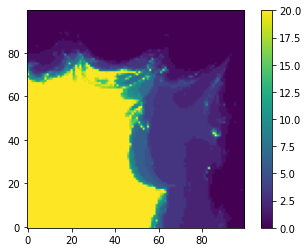

In [33]:
plt.imshow(file["steps"][:].reshape(particle_config.samples, particle_config.samples), origin="lower")
plt.colorbar()

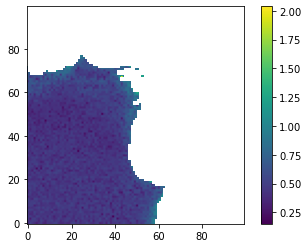

In [34]:
plt.imshow(file[f"lyapunov/{10}"][:].reshape(particle_config.samples, particle_config.samples), origin="lower")
plt.colorbar()

In [42]:
file.close()

In [39]:
particles = intial_conditions.create_particles(context=context)
particles_d_x = displacement_x.create_particles(context=context)
particles_d_px = displacement_px.create_particles(context=context)
particles_d_y = displacement_y.create_particles(context=context)
particles_d_py = displacement_py.create_particles(context=context)
particles_d_zeta = displacement_zeta.create_particles(context=context)
particles_d_delta = displacement_delta.create_particles(context=context)

particles_list = [particles, particles_d_x, particles_d_px, particles_d_y, particles_d_py, particles_d_zeta, particles_d_delta]

In [40]:
output = "ortho_lyapunov.hdf5"

In [41]:
# if output exists, remove it
if os.path.exists(output):
    os.remove(output)

start = time.time()
xe.track_ortho_lyapunov(particles_list, tracker, particle_config, run_config, output, context)
elapsed = time.time() - start

100%|██████████| 5/5 [10:05<00:00, 121.12s/it]


In [ ]:
# print time in hh:mm:ss
print("Time elapsed: {}".format(datetime.timedelta(seconds=elapsed)))
expected_time = elapsed / run_config.times[-1] * 1e6
print("Expected time: {}".format(datetime.timedelta(seconds=expected_time)))

In [43]:
file = h5py.File(output, "r")

In [46]:
np.max(file[f"lyapunov/{10}"][:], axis=0)

array([1.01981692, 1.01883837, 1.0178663 , ...,        nan,        nan,
              nan])

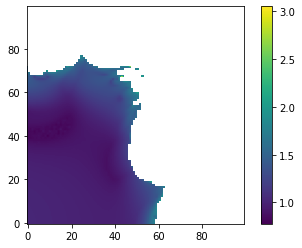

In [47]:
plt.imshow(np.max(file[f"lyapunov/{10}"][:], axis=0).reshape(
    particle_config.samples, particle_config.samples), origin="lower")
plt.colorbar()


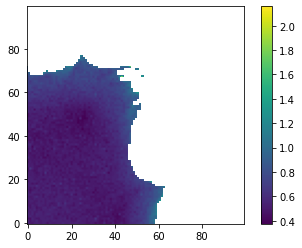

In [48]:
plt.imshow(np.mean(file[f"lyapunov/{10}"][:], axis=0).reshape(
    particle_config.samples, particle_config.samples), origin="lower")
plt.colorbar()


In [49]:
file.close()

In [50]:
particles = intial_conditions.create_particles(context=context)


In [51]:
output = "reverse.hdf5"

In [53]:
# if output exists, remove it
if os.path.exists(output):
    os.remove(output)

start = time.time()
xe.track_reverse(particles, tracker, particle_config, run_config, output, context)
elapsed = time.time() - start

100%|██████████| 4/4 [03:17<00:00, 49.49s/it]


In [ ]:
# print time in hh:mm:ss
print("Time elapsed: {}".format(datetime.timedelta(seconds=elapsed)))
expected_time = elapsed / run_config.times[-1] * 1e6
print("Expected time: {}".format(datetime.timedelta(seconds=expected_time)))

In [54]:
file = h5py.File(output, "r")

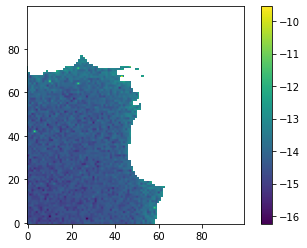

In [58]:
plt.imshow(np.log10(file[f"reverse/{10}"][:]).reshape(particle_config.samples, particle_config.samples), origin="lower")
plt.colorbar()

In [59]:
file.close()

In [60]:
particles = intial_conditions.create_particles(context=context)
particles_d_x = displacement_x.create_particles(context=context)
particles_d_y = displacement_y.create_particles(context=context)

particles_list = [particles, particles_d_x, particles_d_y]

In [79]:
output = "sali.hdf5"

In [63]:
# if output exists, remove it
if os.path.exists(output):
    os.remove(output)

start = time.time()
xe.track_sali(particles, particles_d_x, particles_d_y, tracker, particle_config, run_config, output, context)
elapsed = time.time() - start

100%|██████████| 5/5 [03:42<00:00, 44.46s/it]


In [ ]:
# print time in hh:mm:ss
print("Time elapsed: {}".format(datetime.timedelta(seconds=elapsed)))
expected_time = elapsed / run_config.times[-1] * 1e6
print("Expected time: {}".format(datetime.timedelta(seconds=expected_time)))

In [80]:
file = h5py.File(output, "r")

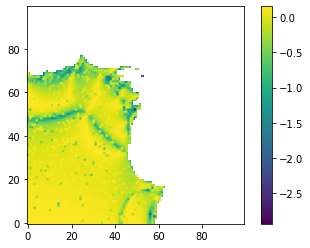

In [81]:
plt.imshow(np.log10(file[f"sali/{10}"][:]).reshape(
    particle_config.samples, particle_config.samples), origin="lower")
plt.colorbar()


In [82]:
file.close()

In [70]:
particles = intial_conditions.create_particles(context=context)
particles_d_x = displacement_x.create_particles(context=context)
particles_d_px = displacement_px.create_particles(context=context)
particles_d_y = displacement_y.create_particles(context=context)
particles_d_py = displacement_py.create_particles(context=context)

particles_list = [particles, particles_d_x, particles_d_px, particles_d_y, particles_d_py]


In [83]:
output = "gali_4.hdf5"

In [72]:
# if output exists, remove it
if os.path.exists(output):
    os.remove(output)

start = time.time()
xe.track_gali_4(particles_list, tracker, particle_config, run_config, output, context)
elapsed = time.time() - start

100%|██████████| 5/5 [05:54<00:00, 70.94s/it] 


In [ ]:
# print time in hh:mm:ss
print("Time elapsed: {}".format(datetime.timedelta(seconds=elapsed)))
expected_time = elapsed / run_config.times[-1] * 1e6
print("Expected time: {}".format(datetime.timedelta(seconds=expected_time)))

In [84]:
file = h5py.File(output, "r")

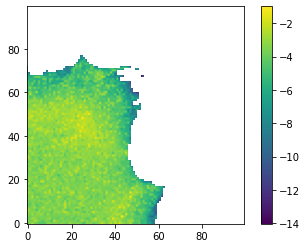

In [85]:
plt.imshow(np.log10(file[f"gali/{10}"][:]).reshape(
    particle_config.samples, particle_config.samples), origin="lower")
plt.colorbar()


In [75]:
file.close()

In [6]:
particles = intial_conditions.create_particles(context=context)
particles_d_x = displacement_x.create_particles(context=context)
particles_d_px = displacement_px.create_particles(context=context)
particles_d_y = displacement_y.create_particles(context=context)
particles_d_py = displacement_py.create_particles(context=context)
particles_d_zeta = displacement_zeta.create_particles(context=context)
particles_d_delta = displacement_delta.create_particles(context=context)

particles_list = [particles, particles_d_x, particles_d_px, particles_d_y, particles_d_py, particles_d_zeta, particles_d_delta]


In [7]:
output = "gali.hdf5"

In [8]:
# if output exists, remove it
if os.path.exists(output):
    os.remove(output)

start = time.time()
xe.track_gali_6(particles_list, tracker, particle_config, run_config, output, context)
elapsed = time.time() - start

100%|██████████| 5/5 [07:05<00:00, 85.14s/it] 


In [ ]:
# print time in hh:mm:ss
print("Time elapsed: {}".format(datetime.timedelta(seconds=elapsed)))
expected_time = elapsed / run_config.times[-1] * 1e6
print("Expected time: {}".format(datetime.timedelta(seconds=expected_time)))

In [9]:
file = h5py.File(output, "r")

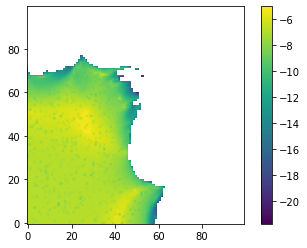

In [10]:
plt.imshow(np.log10(file[f"gali/{10}"][:]).reshape(
    particle_config.samples, particle_config.samples), origin="lower")
plt.colorbar()


In [11]:
file.close()